<img height="80" width="800" src="https://www.autojini.com/files/siteContent/editor/blog/automobileIndustry.jpg"></img>
### <font color='maroon' size= 6 align=middle><b> "Automobile Dataset-Deep Dive Analysis" </b></font>

## <font color ="crimson" size=5><b>"Agenda"</b></font>

1. [Reading the Datasets](#Datasets)<br>
    -1.1 [Reading the Datasets and importing all Packages](#Datasets)<br>
    -1.2 [Understanding the dataset and cleaning the datasets](#Cleaning)<br>
    -1.3 [Visualization](#Visualization)<br><br>
    
2. [Findings](#Finding)<br>

3. [Building Model](#Models)<br>
  -3.1 [Decision Tree Implementation](#DT)

    

### 1.1 "Reading the Datasets and importing all Packages"<a id='Datasets'>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Getting the Current Working Directory
os.getcwd()

#Changing the Working Directory so that the dataset is been fetched from that directory
os.chdir('D:/BigDataProjects/DataScience/Upx/Python_Learning_Tracks/Project/ProjectDatasets/Project_4_Automobile_data/Project_4_Automobile data')
print("The dataset file is present!! Good to Go!! ",os.listdir())

df_auto= pd.read_csv("Automobile_data.txt")

print("\nThe Total no of Rows and Column in Dataset are",df_auto.shape)
print("\nThe datasets are as follows")
df_auto.head(2)


The dataset file is present!! Good to Go!!  ['Automobile_data.txt']

The Total no of Rows and Column in Dataset are (205, 26)

The datasets are as follows


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500


In [2]:
df_auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized-losses    205 non-null object
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         205 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 205 non-null object
stroke               205 non-null object
compression-ratio    205 non-null float64
horsepower           205 non-nul

### 1.2 Understanding the dataset and cleaning the datasets<a id="Cleaning">

In [3]:
# Cleaning feature column and replacing '?' with null Value in the field
df_auto.replace('?',np.nan, inplace=True)

In [4]:
# Check if there is null value in feature Column. If yes,then display the could of Null value of each column field.
# We can see that there are total 7 feature column which have null value in it.
df_auto.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

#### Filling the the null value with mean( in case of Numeric) and mode(in Case String type)

In [5]:
def convert_null(series):
    return series.fillna(series.median())

In [6]:
# Filling the null value which is of Numeric Types
df_auto.horsepower=df_auto['horsepower'].transform(convert_null)
df_auto.bore=df_auto['bore'].transform(convert_null)
df_auto.stroke=df_auto['stroke'].transform(convert_null)
df_auto.price=df_auto['price'].transform(convert_null)
df_auto['peak-rpm']= df_auto['peak-rpm'].transform(convert_null)

In [7]:
# Converting the Dtype of Price from Object type to Numeric Datatype
df_auto.price=pd.to_numeric(df_auto['price'], errors='coerce')


In [8]:
# Filling the null value which is of String type
df_auto['normalized-losses'].fillna(str(df_auto['normalized-losses'].mode().values[0]),inplace=True)
df_auto['num-of-doors'].fillna(str(df_auto['num-of-doors'].mode().values[0]),inplace=True)

In [9]:
# Checking if there is still Null Value after Cleaning the Data
df_auto.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

### 1.3 Visualization <a id="Visualization">

#### Heat Map Visualization to depict the colinearity between each other feature columns

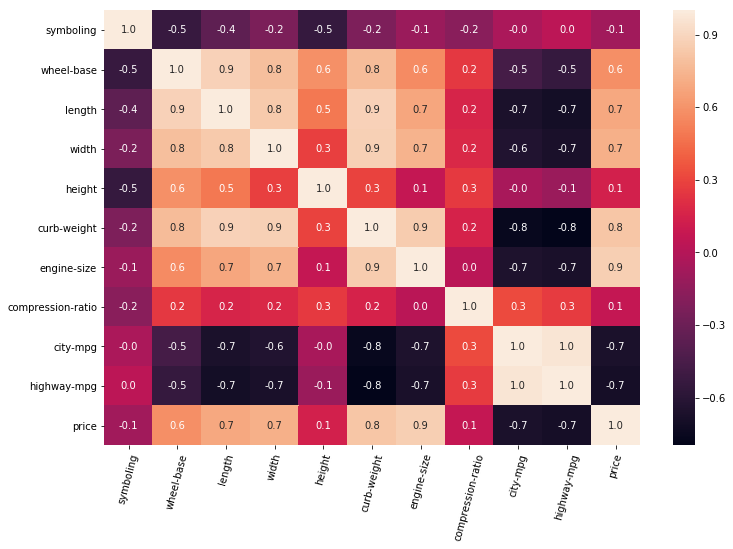

In [10]:
plt.figure(figsize=(12,8))
plt.xticks(rotation=75)
plt.yticks(rotation=30)
sns.heatmap(df_auto.corr(),annot=True,fmt='.1f')

<P/>
<h3/><u>Findings from Correlation heatmap Matrix</u></h3>

1.Price is more correlated with engine size and curb weight of the car><br>
2.Curb weight is mostly correlated with engine size, length, width and wheel based which is expected as these adds up the weight of the car<br>
Wheel base is highly correlated with length and width of the car<br>

And Vice-Versa
<p/>

#### Count and Visual representation of no of Top 5 Vehicle Maker 

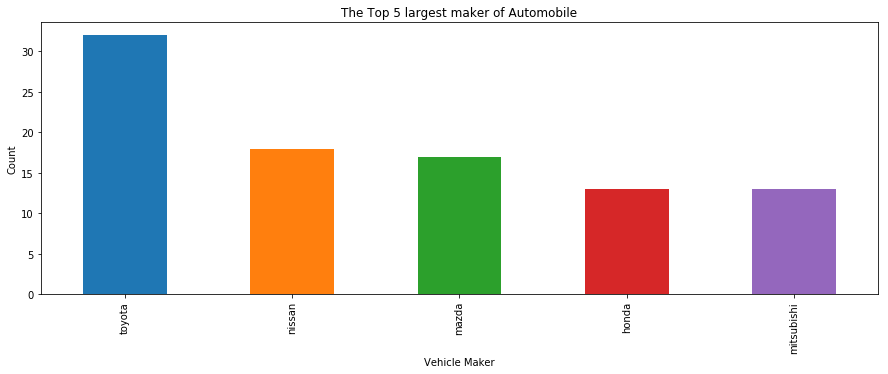

In [11]:
plt.title("The Top 5 largest maker of Automobile")
plt.xlabel("Vehicle Maker")
plt.ylabel("Count")
df_auto.make.value_counts().nlargest(5).plot(kind='bar',figsize=(15,5))


### Comparision of Fuel Type Distribution across Vehicle maker with respect to price and No of Door of Vehicle

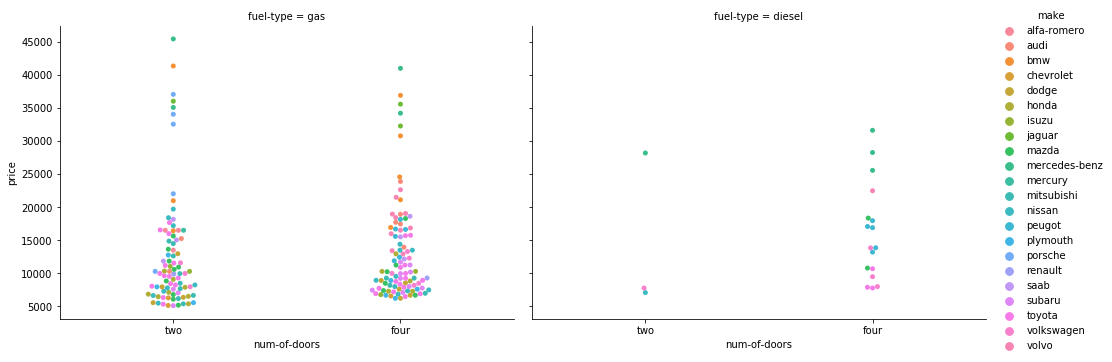

In [12]:
sns.catplot(x='num-of-doors',y='price',col='fuel-type',hue='make',data=df_auto[df_auto.notnull()], kind='swarm',aspect=1.4)

### % Distribution Fuel Type of Automobile Datasets

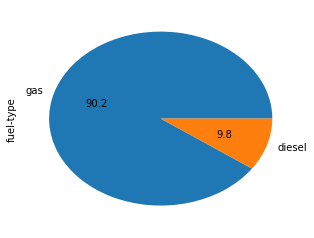

In [13]:
df_auto['fuel-type'].value_counts().plot.pie(figsize=(5,4),autopct='%.1f')

### curb-weight Distribution Graphs

Text(0.5,0,'Curb weight')

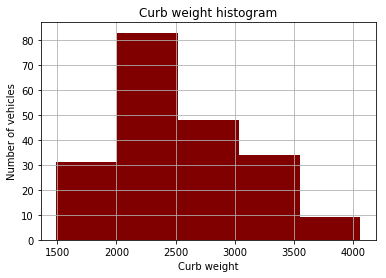

In [14]:
df_auto['curb-weight'].hist(bins=5,color='maroon');
plt.title("Curb weight histogram")
plt.ylabel('Number of vehicles')
plt.xlabel('Curb weight')

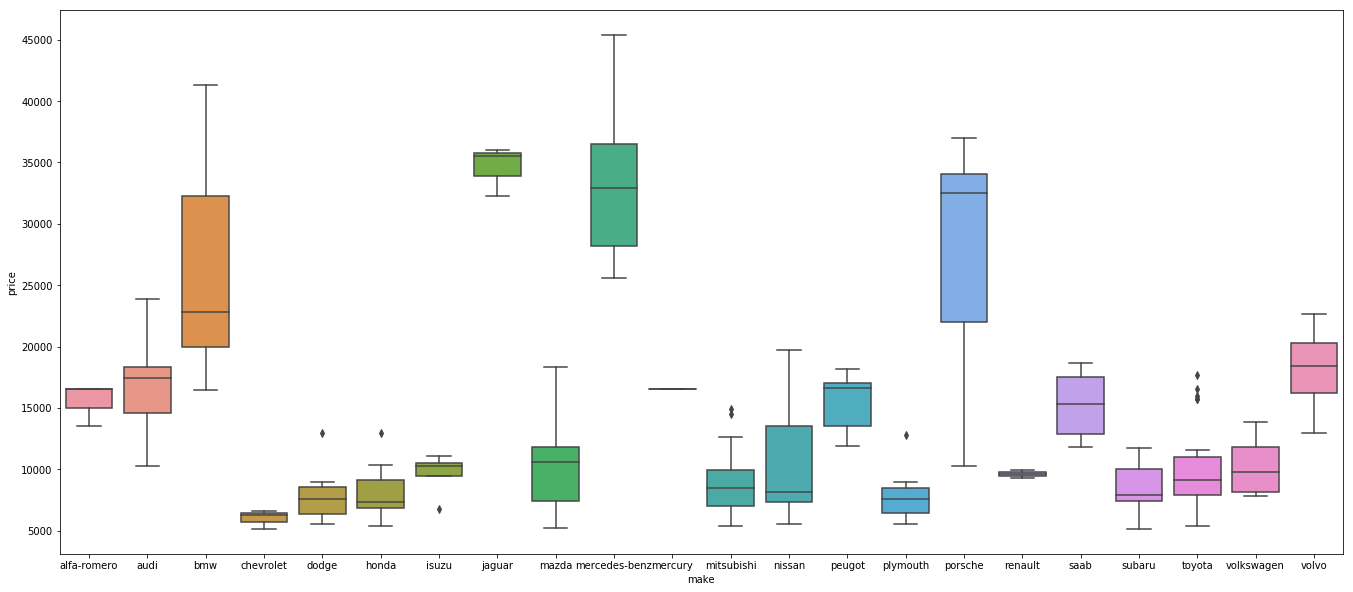

In [15]:
plt.rcParams['figure.figsize']=(23,10)
ax = sns.boxplot(x="make", y="price", data=df_auto)

### Showing with the Plot: Linear Relation between the Feature Columns
#### The Graphs Shows Bigger the Engine Size More is the Cost. We observe that price and engine-size is positively correlated, so as the size of the engine increases price also increases as illustrated by the scatter plot below

C:\Users\Mowgli\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


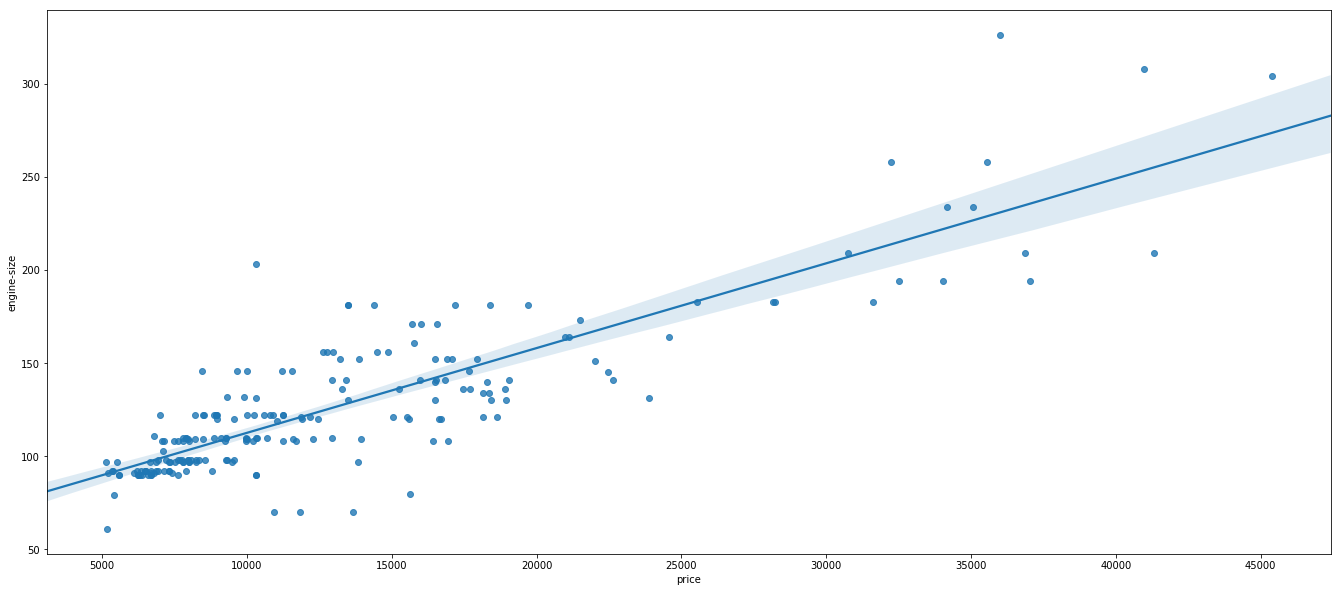

In [16]:
sns.regplot('price',"engine-size", df_auto)

### It is observe that price and city-mpg(mileage) is negatively correlated, so as the city-mpg increases price decreases as illustrated by the scatter plot below.

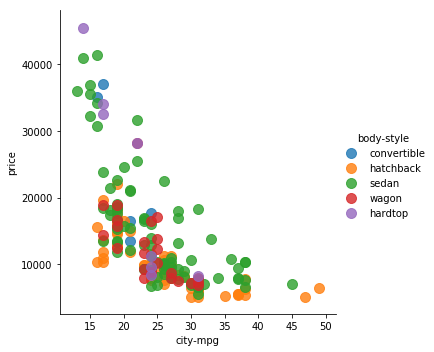

In [17]:
sns.lmplot('city-mpg','price',data=df_auto,fit_reg=False,hue="body-style",scatter_kws={"marker": "D","s": 100})

### Drive wheels Comparision with Price: Boxplot Representaion
Real wheel drive cars are most expensive and front wheel is least expensive cars.<br>
Four wheel drive cars are little higher than the front wheel drive cars. 


<Figure size 1440x720 with 0 Axes>

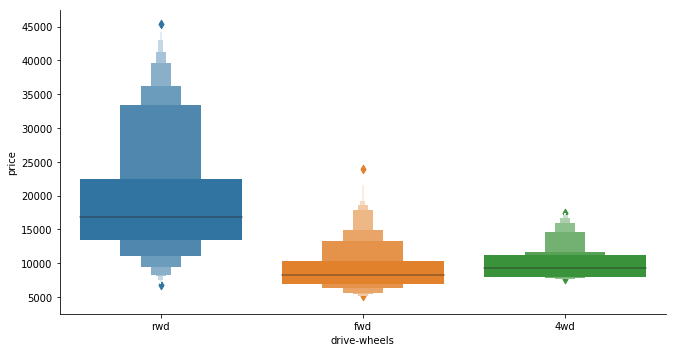

In [18]:
plt.figure(figsize=(20,10))
sns.catplot(x="drive-wheels", y="price", data=df_auto,kind='boxen',aspect=1.9)

## 2. Finding<a id="Finding">

<P/>
<h3><u>The following are some finding of automobile dataset for analysis.</h3></u>

1.Toyota is the make of the car which has most number of vehicles with more than 40% than the 2nd highest Nissan<br><br>
2.Most of the vehicle of fuel type is of Gas with total of 90.2% as compare to Disel which is of 8.8%<br><br> 
3.Curb weight of the cars are distributed between 1500 and 4000 approximately.Maximum no of vehicle having curbweight between 2000 to 2500<br><br>
4.From the boxplot, we have the following findings for  vehicle maker vs price of the car<br>
         -***4.1*** The most expensive car is manufacture by Mercedes benz and the least expensive is   Chevrolet<br>
         -***4.2*** The premium cars costing more than 20000 are BMW, Jaquar, Mercedes benz and Porsche<br>
         -***4.3*** Less expensive cars costing less than 10000 are Chevrolet, Dodge, Honda, Mitsubishi, Plymoth and Subaru<br>
         -***4.4*** Rest of the cars are in the midrange between 10000 and 20000 which has the highest number of cars<br><br>
5.The Graphs Shows Bigger the Engine Size More is the Cost<br>

<P/>

## 3.Building Model<a id="Models">

### 3.1 Decision Tree Implementation<a id="DT">

In [19]:
#importing the Packages
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import train_test_split

C:\Users\Mowgli\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [20]:
df_auto.head(1)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,161,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0


### Feature Columns

#### Converting the column into Categorical for better Efficency

In [21]:
default_fuel=pd.get_dummies(df_auto['fuel-type'],prefix="Fuel",drop_first=True)
df_auto=pd.concat([df_auto,default_fuel],axis=1)
df_auto.drop(['fuel-type'],axis=1,inplace=True)

In [22]:
default_engine=pd.get_dummies(df_auto['engine-location'],prefix="Engine",drop_first=True)
df_auto=pd.concat([df_auto,default_engine],axis=1)
df_auto.drop(['engine-location'],axis=1,inplace=True)

In [23]:
default_body=pd.get_dummies(df_auto['body-style'],prefix="body",drop_first=True)
df_auto=pd.concat([df_auto,default_body],axis=1)
df_auto.drop(['body-style'],axis=1,inplace=True)

In [24]:
df_auto.head(5)

,symboling,normalized-losses,make,aspiration,num-of-doors,drive-wheels,wheel-base,length,width,height,...,peak-rpm,city-mpg,highway-mpg,price,Fuel_gas,Engine_rear,body_hardtop,body_hatchback,body_sedan,body_wagon
0,3,161,alfa-romero,std,two,rwd,88.6,168.8,64.1,48.8,...,5000,21,27,13495.0,1,0,0,0,0,0
1,3,161,alfa-romero,std,two,rwd,88.6,168.8,64.1,48.8,...,5000,21,27,16500.0,1,0,0,0,0,0
2,1,161,alfa-romero,std,two,rwd,94.5,171.2,65.5,52.4,...,5000,19,26,16500.0,1,0,0,1,0,0
3,2,164,audi,std,four,fwd,99.8,176.6,66.2,54.3,...,5500,24,30,13950.0,1,0,0,0,1,0
4,2,164,audi,std,four,4wd,99.4,176.6,66.4,54.3,...,5500,18,22,17450.0,1,0,0,0,1,0


In [114]:
y=df_auto['price']
columns=['city-mpg','highway-mpg']
feature_col=df_auto[list(columns)].values
X=feature_col

In [115]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.30,random_state=100)
my_tree= tree.DecisionTreeRegressor(max_depth=10,random_state=123)
my_tree.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=10, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=123, splitter='best')

In [121]:
list(zip(columns,my_tree.feature_importances_))

[('city-mpg', 0.1809083588961407), ('highway-mpg', 0.8190916411038593)]

#### Predicting the accuracy of the training Model

In [117]:
my_tree.score(X_train,y_train)

0.8949219604477903

### <font color="Red">Predicting the Accuracy of the Model</font>

In [118]:
from sklearn import metrics
y_pred=my_tree.predict(X_test)
#Result=np.sqrt(metrics.mean_squared_error(y_test,y_pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

RMSE: 2759.802208342591


### 3.2 Random Forest

In [124]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import train_test_split
my_forest= RandomForestRegressor(max_depth=10,random_state=100)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=100)

In [125]:
my_forest.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=100, verbose=0, warm_start=False)

In [126]:
list(zip(columns,my_forest.feature_importances_))

[('city-mpg', 0.34959084262242424), ('highway-mpg', 0.6504091573775758)]

In [129]:
my_pred=my_forest.predict(X_test)
Accuracy="RMSE:",np.sqrt(metrics.mean_squared_error(y_test,my_pred))
Accuracy

('RMSE:', 3019.5107599672037)